# PISA 2012 Data (Communicate Data Findings)

**PISA is a unique global survey that examines how well prepared 15 year old students are for life after they have completed school. Approximately a half million students and 65 economies participated in this assessment that deals with reading, math, and science literacy.** 

The full 2012 PISA dataset can be found [here.](pisa2012.csv/pisa2012.csv)

The PISA data dictionary, which gives a brief explaination of each feature, can be found [here.](pisadict2012.csv)

**For my analysis, I wanted to focus on how gender plays a role in not only student's mathematics scores but also student's attitude towards mathematics. I also wanted to take a look at if the parent's attitude towards children's mathematics differ among the gender.**


The original data set contains 485,490 students and 636 features. Due the extremely large size of our features and the fact that we wanted to focus on gender, we have downsized our data set to include only 10 features.


My data cleaning process can be found [here.](pisa2012_data_cleanup.ipynb)


### BRIEF DATA CLEANING PROCESS ###

For our data cleaning process, we focused on features that dealt with the country, gender, math scores, student's attitudes and student's perceived attitudes of parents towards mathematics. Student's attitudes can be broken down into categories: instrumental motivation, math anxiety, math self-concept, math interest, math work ethic, and math behavior. For each subcategory under student's attitudes, I assigned points and took the average to represent the overall score for each subcategory. For example, instumental motivation asks 4 questions (worthwhile for work, worthwhile for career changes, important for future study, and helps to get a job). Each of these questions can be answered by either 'Strongly Agree', 'Agree', 'Disagree','Strongly Disagree.' After focusing on only certain features as well as combining features, we are left with a total of 17 features. 

**OUR FINAL FEATURES**
+ **country**


+ **gender**


+ **overall_score**: student's overall math score

    
+ **The following are on a 4 point scale (4 points Strongly Agree, 3 points Agree, 2 points Disagree, 1 point Strongly Disagree):**
    + **motivation**: worthwhile for work, worthwhile for career changes, important for future study, helps to get a job
    + **anxiety**: worry that it will be difficult, get very tense, get very nervous, feel helpless, worry about getting poor grades
    + **interest**: enjoy reading, look forward to lessons, enjoy maths, interested
    + **work_ethic**: homework completed on time, work hard on homework, prepared for exams, student hard for quizzes, study until I understand everything, pay attention in class, listen in classes, avoid distractions when studying, keep work organized
    + **parents**: student's perceived view of parent's attitude towards mathematics; parents believe studying mathematics is important, parents believe mathematics is important for career, parents like mathematics


+ **The following are on a 4 point scale (4 points Almost of Almost Always, 3 points Often, 2 points Sometimes, 1 point Never or rarely):**
    + **behavior**: talk about maths with friends, help friends with mat, extracurricular activity,participates in competition, study more than 2 extra hours a day, play chess, computer programming, participates in math club

**NOTE:**
Features under motivation, anxiety, interest, work_ethic, parents, and behavior all fall in a 4 point system scale. It is important to note that anxiety's scale shows 4 points being a negative behavior and 1 point shows a positive behavior (student's lack of anxiety towards mathematics). Contrary, the remainder of features here show the opposite. For example, interest's 4 points shows that a student is highly interested in math and 1 points show s student's lack of interest. 

## DATA EXPLORATION ##

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline
# plt.style.use('fivethirtyeight')

In [4]:
df_pisa=pd.read_csv('pisa2012_clean.csv')
df_pisa.head()

country  gender  score_overall  motivation  anxiety  interest  work_ethic  \
0  Albania  Female       406.8469        3.50      2.6      3.00    3.000000   
1  Albania  Female       486.1427        2.75      NaN      2.25    3.222222   
2  Albania  Female       533.2684        4.00      NaN      3.25    3.888889   
3  Albania  Female       412.2215         NaN      NaN       NaN         NaN   
4  Albania  Female       381.9209        4.00      3.2      2.50    3.777778   

    parents  behavior  self  
0  3.000000      1.75   2.8  
1  2.666667      2.50   NaN  
2  3.666667      2.00   NaN  
3       NaN       NaN   2.6  
4  3.666667       NaN   2.4

In [3]:
#overview of data shape and composition
print(df_pisa.shape,'\n')
print(df_pisa.info())

(485490, 10) 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 485490 entries, 0 to 485489
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   country        485490 non-null  object 
 1   gender         485490 non-null  object 
 2   score_overall  485490 non-null  float64
 3   motivation     312694 non-null  float64
 4   anxiety        307425 non-null  float64
 5   interest       311611 non-null  float64
 6   work_ethic     306731 non-null  float64
 7   parents        311682 non-null  float64
 8   behavior       307112 non-null  float64
 9   self           306931 non-null  float64
dtypes: float64(8), object(2)
memory usage: 40.7+ MB
None


In [4]:
df_pisa[['country','gender']]=df_pisa[['country','gender']].astype('category')

In [5]:
print(df_pisa.describe())

       score_overall     motivation        anxiety       interest  \
count  485490.000000  312694.000000  307425.000000  311611.000000   
mean      469.621653       2.988886       2.495314       2.445061   
std       103.265391       0.740661       0.683011       0.779287   
min        19.792800       1.000000       1.000000       1.000000   
25%       395.318600       2.500000       2.000000       2.000000   
50%       466.201900       3.000000       2.400000       2.500000   
75%       541.057800       3.500000       3.000000       3.000000   
max       962.229300       4.000000       4.000000       4.000000   

          work_ethic        parents       behavior           self  
count  306731.000000  311682.000000  307112.000000  306931.000000  
mean        2.866265       3.066485       1.677428       2.482890  
std         0.577228       0.610225       0.557671       0.742968  
min         1.000000       1.000000       1.000000       1.000000  
25%         2.555556       2.666667   

**What is the structure of your dataset?**

There are 485,490 students in the dataset with 17 features (country, gender, overall math score, motivation, anxiety, interest, work ethic, behavior, self, and parents). Country and Gender are of category type and the remainder of the features are numeric.

**What is/are the main feature(s) of interest in your dataset?**


For my analysis, I am interested in seeing the effects of gender has on students' mathematical skills. I not only wanted to take into account the students' math scores, but also the students and parent's feelings towards Mathematics. 

From my own experience of studying Mathematics in college, I have seen a large gender gap in my higher math classes where the male student population far exceeds that of female students. This makes me wonder if the large gender gap is due to having a gap in scores and/or attitude between gender. In addition, I would also like to know if the Mathematic Skills and Attitudes between Gender across different countries as well if a student's perceived attitude of their parents differ between gender.

**What features in the dataset do you think will help support your investigation into your feature(s) of interest?**


I expect that there will be a higher overall test and subsection score among males compared to that of females. For test scores, we will be looking at the score_overall. I also expect there to be a higher attitude towards mathematics among males compared to that of the females. For attitudes, we will be looking at the following features: motivation, anxiety, interest, work_ethic, behavior, and self. All attitude features, with the exception of 'anxiety', show that the higher the score is, the better the student's attitude is towards Mathematics. 


### Univariate Exploration 

**SCORES**

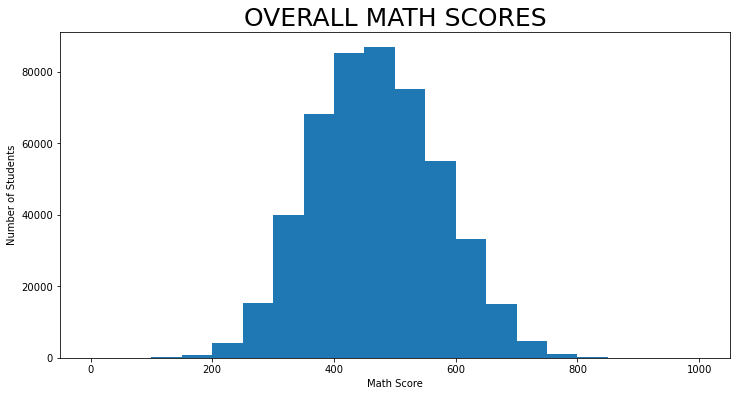

In [6]:
#Overall Score
binsize=50
bins=np.arange(0,df_pisa['score_overall'].max()+binsize,binsize)

plt.figure(figsize=[12,6])
plt.hist(data= df_pisa,x='score_overall',bins=bins)
plt.title('OVERALL MATH SCORES', size=25)
plt.xlabel('Math Score')
plt.ylabel('Number of Students');

plt.savefig('hist_score_overall.png')

The Overall Score looks pretty much normally distributed with a peak at around 500.

**GENDER**

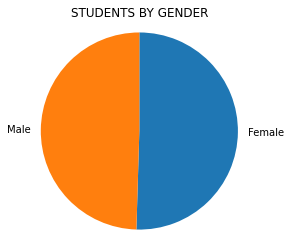

In [7]:
plt.pie(df_pisa['gender'].value_counts(), labels=df_pisa['gender'].value_counts().index,startangle=90,counterclock=False)
plt.axis('square')
plt.title('STUDENTS BY GENDER');

In [8]:
print('Male Students: {:.4f}%'.format(df_pisa['gender'].value_counts()['Male']/df_pisa.shape[0]))
print('Female Students: {:.4f}%'.format(df_pisa['gender'].value_counts()['Female']/df_pisa.shape[0]))


Male Students: 0.4952%
Female Students: 0.5048%


**Gender is almost evenly split.**

**COUNTRY**

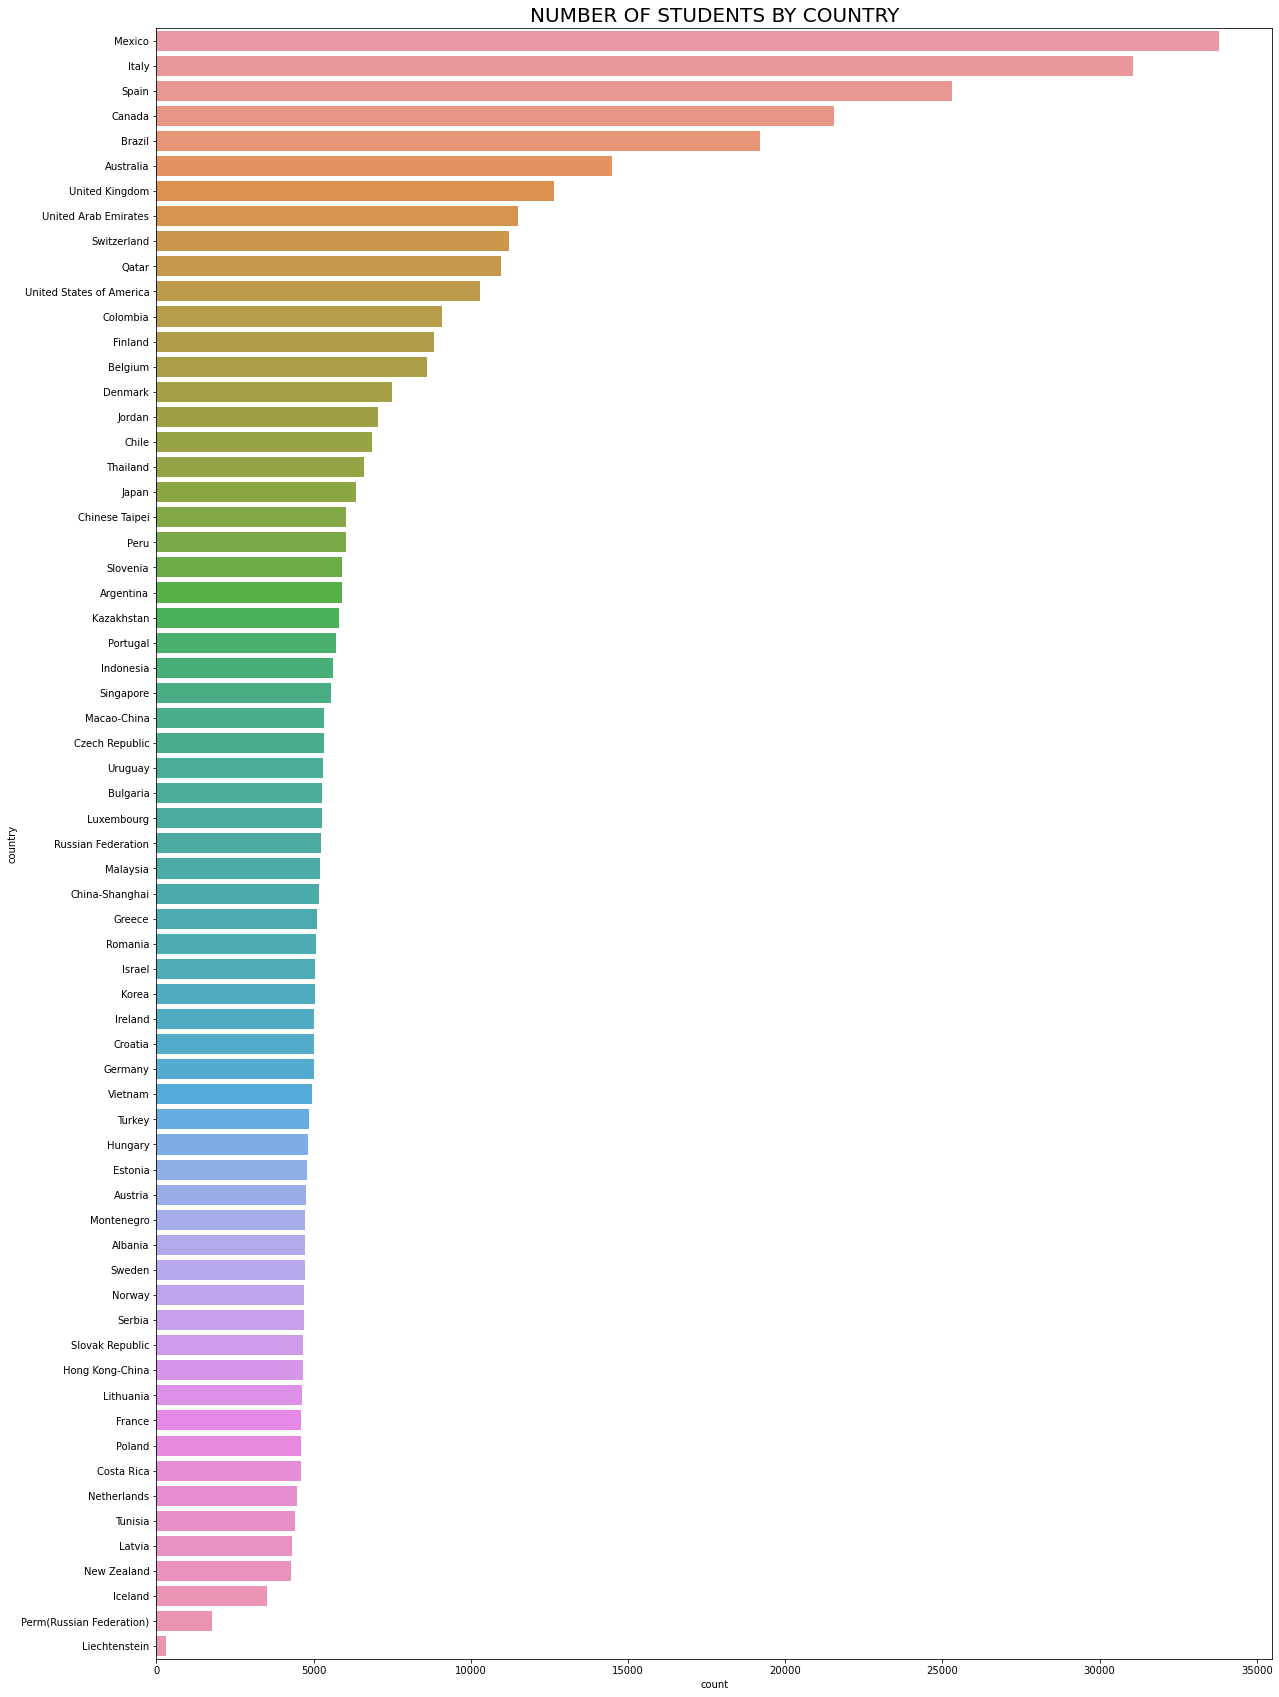

In [9]:
order= df_pisa['country'].value_counts().index

plt.figure(figsize=[20,30])
sb.countplot(data=df_pisa,y='country',order=order)
plt.title('NUMBER OF STUDENTS BY COUNTRY',size=20);

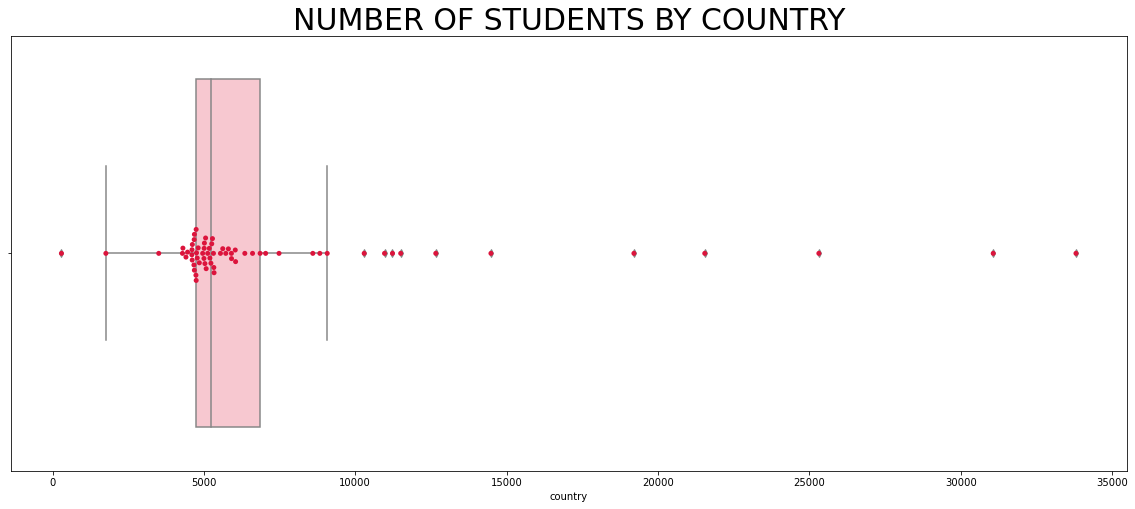

In [10]:
plt.figure(figsize=(20,8))
sb.boxplot(df_pisa['country'].value_counts(), color='pink')
sb.swarmplot(df_pisa['country'].value_counts(), color='crimson')
plt.title('NUMBER OF STUDENTS BY COUNTRY', size=30);


**Most countries have between 5000ish to 7000ish students taking the survey. The boxplot also shows that there are a few outliers. For example, Mexico and Italy have over 30,000 students and Liechtenstein has well below 1000 students.**

In [11]:
df_pisa['country'].value_counts().describe()

count       65.000000
mean      7469.076923
std       6125.192028
min        293.000000
25%       4743.000000
50%       5231.000000
75%       6856.000000
max      33806.000000
Name: country, dtype: float64

**ATTITUDE**

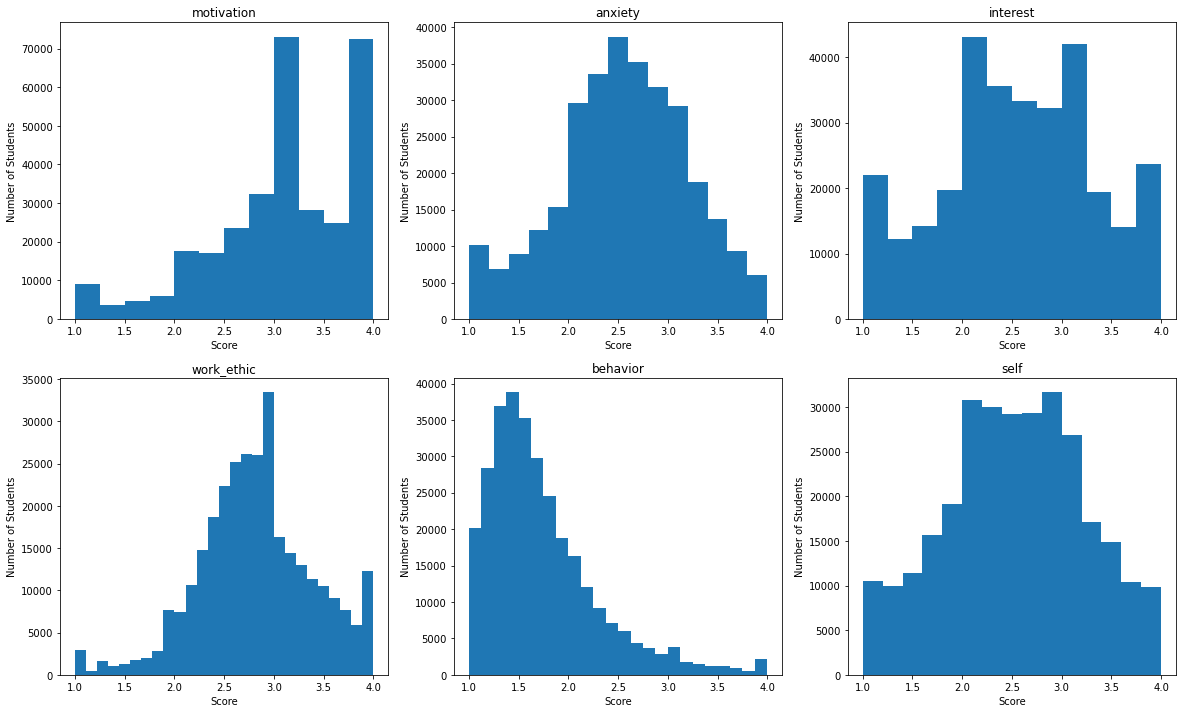

In [12]:
#Subsection Attitude
attitude=['motivation', 'anxiety','interest', 'work_ethic', 'behavior', 'self']

fig, ax= plt.subplots(nrows=2,ncols=3,figsize=[20,12])

#binsizes were determined by number of questions per section.
#binsizes = 1/(number of questions per section)
binsizes=[1/4,1/5,1/4,1/9,1/8,1/5]

ax=ax.flatten()
i=0

for feature in attitude:
    bins=np.arange(min(df_pisa[feature]), max(df_pisa[feature]) +binsizes[i], binsizes[i])
    ax[i].hist(data=df_pisa, x=feature, bins=bins)
    ax[i].set_xlabel('Score')
    ax[i].set_ylabel('Number of Students')
    ax[i].set_title(feature)
    i+=1



+ **under the motivation feature, it looks like the graph is slighly skewed to the left with spikes at points 3-3.25 and 3.75-4.**

+ **anxiety is almost normally distributed**

+ **work_ethic is slightly skewed to the left with a spike at around 3 points.**

+ **behavior is skewed to the right showing that most students do not take extra actions towards Mathematics such as taking about math with friends, play chess, or computer programming**

**PARENTS**

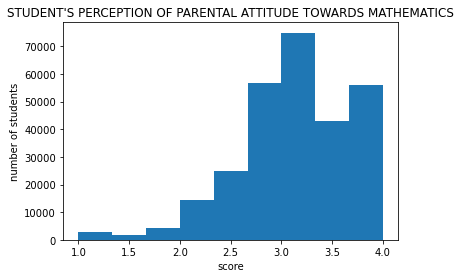

In [13]:
binsize=1/3
bins=np.arange(df_pisa['parents'].min(),df_pisa['parents'].max() +binsize, binsize)

plt.hist(data=df_pisa, x='parents', bins=bins)
plt.xlabel('score')
plt.ylabel('number of students')
plt.title('STUDENT\'S PERCEPTION OF PARENTAL ATTITUDE TOWARDS MATHEMATICS');

**The graph is slightly skewed to the left showing that most students have a positive view of their parent's attitudes towards Mathematics**

### What if we now just take a look at just the top percentile of students and see how gender is distributed?

In [14]:
df_75=df_pisa.query('score_overall>=@df_pisa.score_overall.quantile(.75)')
df_90=df_pisa.query('score_overall>=@df_pisa.score_overall.quantile(.90)')
df_95=df_pisa.query('score_overall>=@df_pisa.score_overall.quantile(.95)')
df_99=df_pisa.query('score_overall>=@df_pisa.score_overall.quantile(.99)')

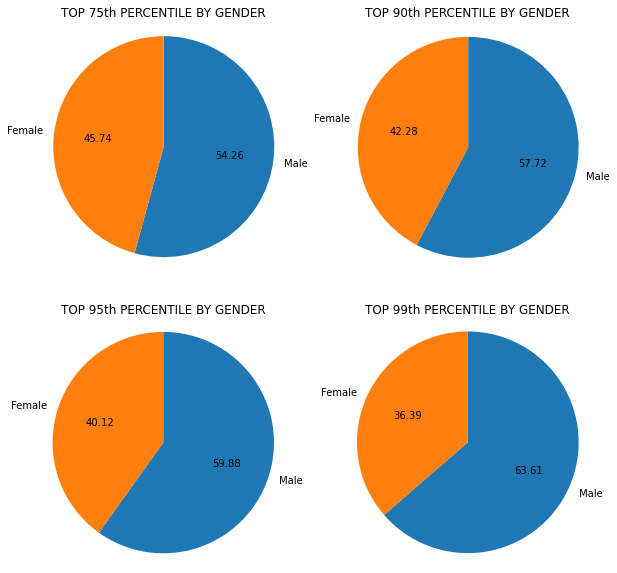

In [15]:
percent=[75,90,95,99]
fig, ax=plt.subplots(nrows=2, ncols=2, figsize=(10,10))

ax=ax.flatten()

for i in range(4):
    plt.sca(ax[i])
    df=eval('df_'+str(percent[i]))
    plt.pie(df['gender'].value_counts(), labels=df['gender'].value_counts().index,startangle=90,counterclock=False,autopct='%.2f')
    plt.axis('square')
    plt.title('TOP '+ str(percent[i])+'th PERCENTILE BY GENDER')

**This is actually very interesting to see. Notice how as the top nth percentile increases, the gender gap increases as well.**

### BIVARIATE EXPLORATION ###

**Gender by Each Country**

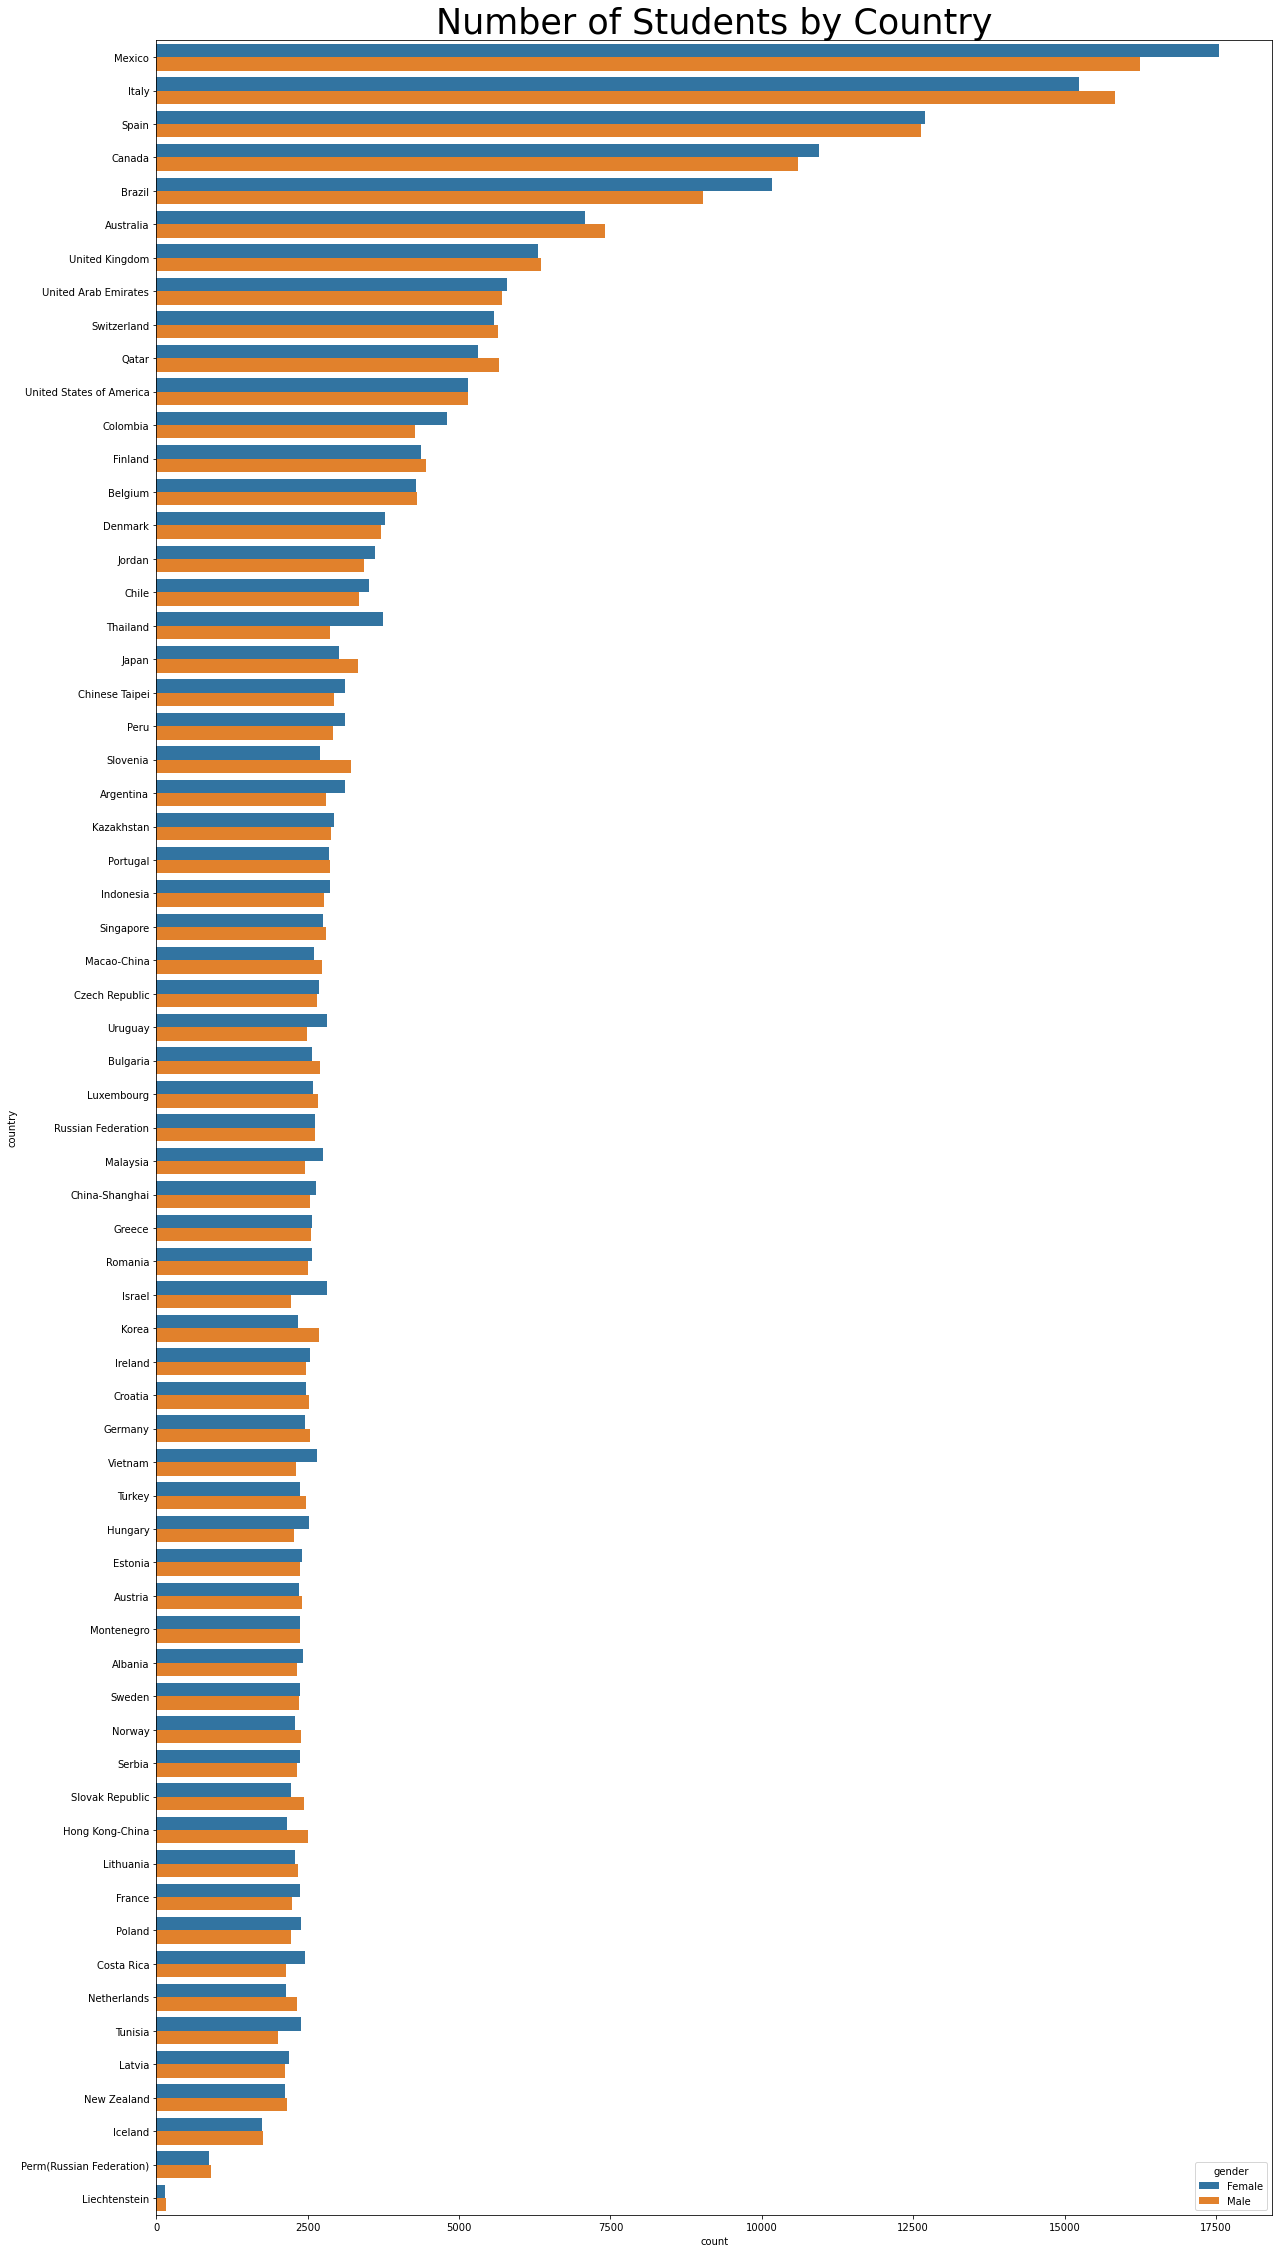

In [16]:
order= df_pisa['country'].value_counts().index

plt.figure(figsize=[20,40])
sb.countplot(data=df_pisa,y='country',order=order,hue='gender')
plt.title('Number of Students by Country',size=35);

**While most countries show an almost 50/50 split between gender, there are some countries like Mexico, Thailand and Israel that show an very uneven split. Let's take a closer look at this!**

In [17]:
country=df_pisa['country'].unique().tolist()
country.sort()

In [18]:
female=df_pisa.query('gender=="Female"').groupby('country').size()
male=df_pisa.query('gender=="Male"').groupby('country').size()

In [19]:
# we must make sure that the index matches for all
country==female.index.tolist()==male.index.tolist()

True

In [20]:
df_gender=pd.DataFrame({'country': country, 'female': female.values,'male':male.values})

In [21]:
df_gender['total_pop']=df_gender['female']+df_gender['male']

In [22]:
df_gender['female_percent']=100*(df_gender['female']/df_gender['total_pop'])
df_gender['male_percent']=100*(df_gender['male']/df_gender['total_pop'])
df_gender['diff_percent']=(np.absolute((df_gender['female_percent']-df_gender['male_percent'])))

In [23]:
df_gender.head(10)

country  female   male  total_pop  female_percent  male_percent  \
0         Albania    2416   2327       4743       50.938225     49.061775   
1       Argentina    3113   2795       5908       52.691266     47.308734   
2       Australia    7075   7406      14481       48.857123     51.142877   
3         Austria    2357   2398       4755       49.568875     50.431125   
4         Belgium    4287   4310       8597       49.866232     50.133768   
5          Brazil   10175   9029      19204       52.983753     47.016247   
6        Bulgaria    2578   2704       5282       48.807270     51.192730   
7          Canada   10943  10601      21544       50.793724     49.206276   
8           Chile    3512   3344       6856       51.225204     48.774796   
9  China-Shanghai    2637   2540       5177       50.936836     49.063164   

   diff_percent  
0      1.876450  
1      5.382532  
2      2.285754  
3      0.862250  
4      0.267535  
5      5.967507  
6      2.385460  
7      1.587449  
8      2.450408  
9      1.873672

In [24]:
df_gender['diff_percent'].describe()

count    65.000000
mean      2.978123
std       2.855713
min       0.042159
25%       0.862250
50%       1.889100
75%       4.617358
max      13.109295
Name: diff_percent, dtype: float64

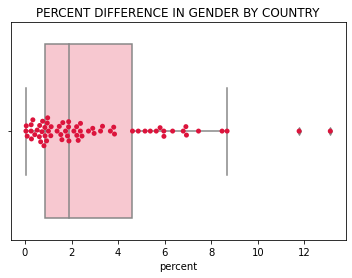

In [25]:
sb.swarmplot(data=df_gender,x='diff_percent',color='crimson')
sb.boxplot(data=df_gender, x='diff_percent',color='pink')
plt.title('PERCENT DIFFERENCE IN GENDER BY COUNTRY')
plt.xlabel('percent');

**Almost half of the countries have a difference in gender of about 2% and lower for students. It even looks like 2 countries have a difference of more than 10%. Why is there such a large gap in gender for students taking these exams for these countries?**

In [26]:
df_gender.sort_values('diff_percent',ascending=False).head(10)

country  female  male  total_pop  female_percent  male_percent  \
57         Thailand    3736  2870       6606       56.554647     43.445353   
26           Israel    2825  2230       5055       55.885262     44.114738   
53         Slovenia    2699  3212       5911       45.660633     54.339367   
58          Tunisia    2390  2017       4407       54.231904     45.768096   
21  Hong Kong-China    2161  2509       4670       46.274090     53.725910   
31            Korea    2342  2691       5033       46.532883     53.467117   
12       Costa Rica    2460  2142       4602       53.455020     46.544980   
64          Vietnam    2648  2311       4959       53.397862     46.602138   
63          Uruguay    2826  2489       5315       53.170273     46.829727   
5            Brazil   10175  9029      19204       52.983753     47.016247   

    diff_percent  
57     13.109295  
26     11.770524  
53      8.678735  
58      8.463808  
21      7.451820  
31      6.934234  
12      6.910039  
64      6.795725  
63      6.340546  
5       5.967507

**If we take a look at the top 10 countries with the most gender differences, 7 out of 10 countries are female dominated.**

**GENDER BY OVERALL SCORES**

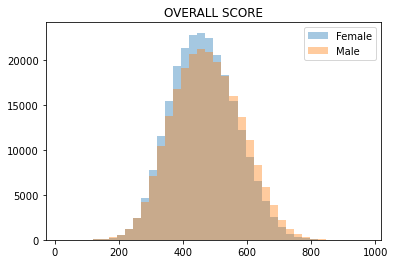

In [27]:
binsize=25
bins=np.arange(min(df_pisa['score_overall']),max(df_pisa['score_overall'])+binsize, binsize)

plt.title('OVERALL SCORE')
plt.hist(data=df_pisa.query('gender=="Female"'),x='score_overall', alpha=.4,bins=bins,label='Female')
plt.hist(data=df_pisa.query('gender=="Male"'),x='score_overall', alpha=.4,bins=bins, label='Male')
plt.legend();

**The Males students consistently score better than the Female students.**

**GENDER BY STUDENT'S PERCEPTION OF PARENTAL ATTITUDE TOWARDS MATHEMATICS**

''

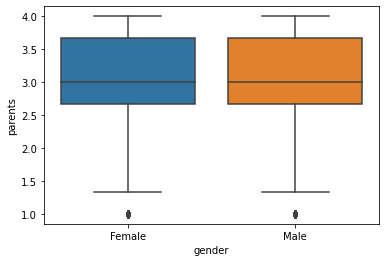

In [28]:
sb.boxplot(data=df_pisa, y='parents', x='gender')
;

In [29]:
df_pisa.query('gender=="Female"').parents.describe(), df_pisa.query('gender=="Male"').parents.describe()

(count    158373.000000
 mean          3.036302
 std           0.610329
 min           1.000000
 25%           2.666667
 50%           3.000000
 75%           3.666667
 max           4.000000
 Name: parents, dtype: float64,
 count    153309.000000
 mean          3.097665
 std           0.608550
 min           1.000000
 25%           2.666667
 50%           3.000000
 75%           3.666667
 max           4.000000
 Name: parents, dtype: float64)

**Note that 5000 less Male students did not answer all the questions under Parental View**

**It looks like the there is only a slight difference in male/female perception of their parent's towards mathematics. For both male and female, the 25%, 50%, and 75% are surprisenly the same.**

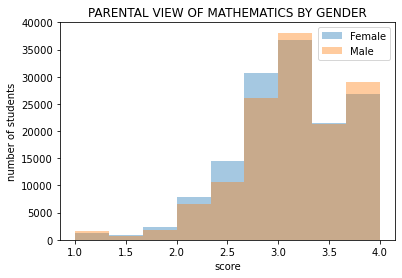

In [30]:

plt.hist(df_pisa.query('gender=="Female"')['parents'],bins=np.arange(1,4+1/3,1/3), label='Female', alpha=.4)
plt.hist(df_pisa.query('gender=="Male"')['parents'],bins=np.arange(1,4+1/3,1/3), label='Male', alpha=.4)
plt.legend()
plt.title('PARENTAL VIEW OF MATHEMATICS BY GENDER')
plt.xlabel('score')
plt.ylabel('number of students');

**Since there is an uneven amount of female and males students who answered all questions under Parental View, let's go ahead and take a look at the density.**

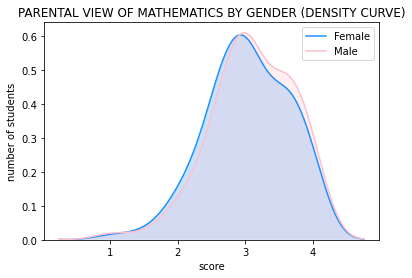

In [31]:
sb.kdeplot(data=df_pisa.query('gender=="Female"')['parents'], shade=True, color='dodgerblue', bw=1/4, label='Female')
sb.kdeplot(data=df_pisa.query('gender=="Male"')['parents'], shade=True, color='pink', bw=1/4, label='Male')
plt.title('PARENTAL VIEW OF MATHEMATICS BY GENDER (DENSITY CURVE)')
plt.xlabel('score')
plt.ylabel('number of students');

**Again we see that only a slight amount of male students view their parent's having a higher perception of mathematics.**

**GENDER BY ATTITUDE**

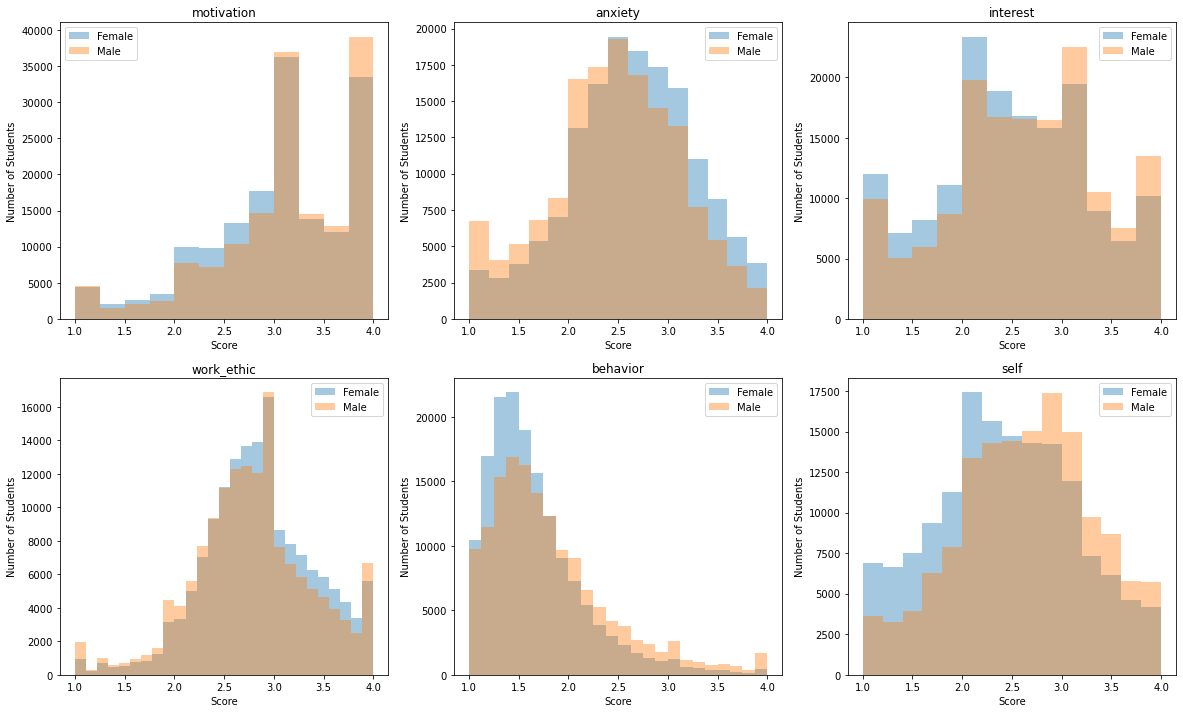

In [32]:
#Subsection Attitude
attitude=['motivation', 'anxiety','interest', 'work_ethic', 'behavior', 'self']

fig, ax= plt.subplots(nrows=2,ncols=3,figsize=[20,12])

#binsizes were determined by number of questions per section.
#binsizes = 1/(number of questions per section)
binsizes=[1/4,1/5,1/4,1/9,1/8,1/5]

ax=ax.flatten()
i=0

for feature in attitude:
    bins=np.arange(min(df_pisa[feature]), max(df_pisa[feature]) +binsizes[i], binsizes[i])
    ax[i].hist(data=df_pisa.query('gender=="Female"'), x=feature, bins=bins,label='Female', alpha=.4)
    ax[i].hist(data=df_pisa.query('gender=="Male"'),x=feature, bins=bins,label='Male', alpha=.4)
    
    ax[i].set_xlabel('Score')
    ax[i].set_ylabel('Number of Students')
    ax[i].set_title(feature)
    ax[i].legend()
    i+=1

plt.savefig('attitudes_gender.png')

**Males students have a high score under motivation, interest, and self. Female students seem to score higher under anxiety as well as work_ethic**

**OVERALL SCORES BY ATTITUDE**

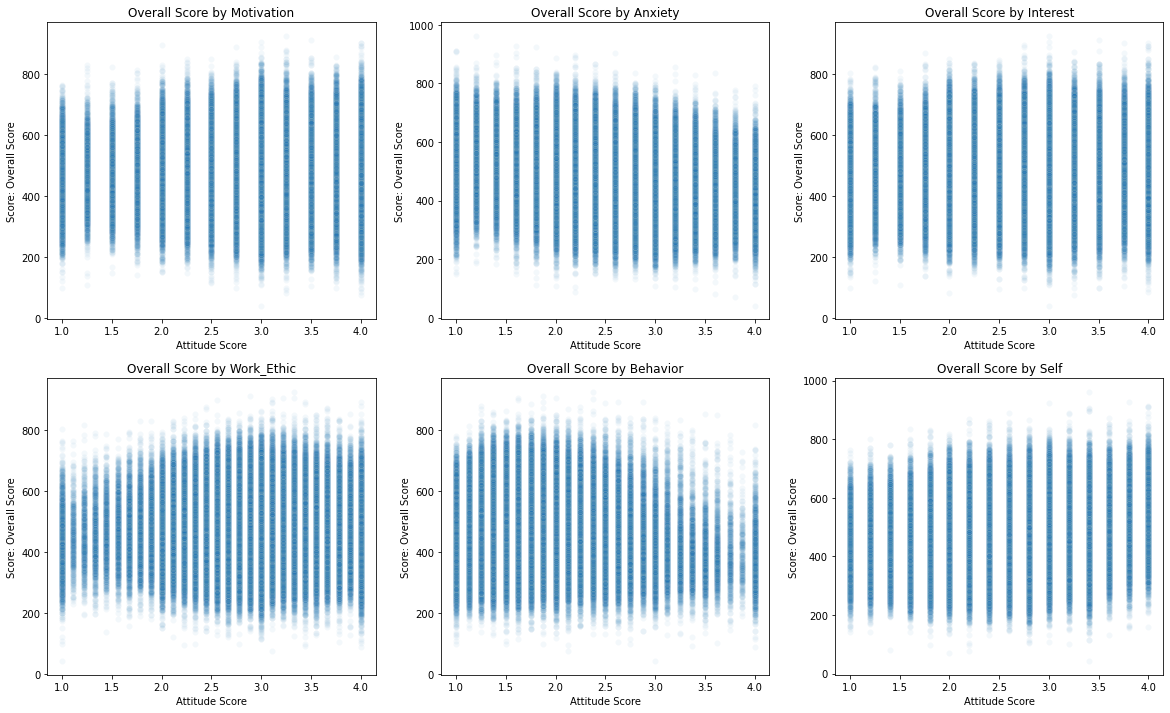

In [33]:
#attitude=['motivation', 'anxiety','interest', 'work_ethic', 'behavior', 'self']

fig, ax= plt.subplots(nrows=2,ncols=3,figsize=[20,12])


ax=ax.flatten()
i=0

for feature in attitude:
    plt.sca(ax[i])
    
    sb.scatterplot(x=df_pisa[feature],y=df_pisa['score_overall'],alpha=.05)
    ax[i].set_ylabel('Score: {}'.format('Overall Score'))
    ax[i].set_xlabel('Attitude Score')
    ax[i].set_title('Overall Score by {}'.format(feature.title()))
    i+=1


**Overall score does not seem to be highly correlated with any features under attitude**

It would be interesting later to see if there does exist a correlation between different 'bins' under Overall Score with each feature under Attitude.

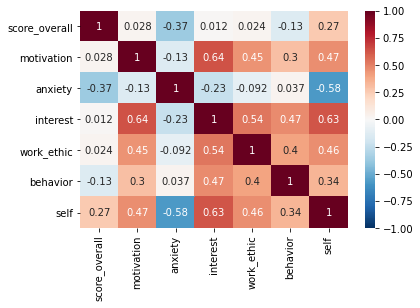

In [34]:
sb.heatmap(data=df_pisa[['score_overall','motivation', 'anxiety','interest', 'work_ethic', 'behavior', 'self']].corr(),
           center=0, cmap="RdBu_r",annot=True, vmin=-1, vmax=1);

**We can also see that there is a moderate positive correlation between self and interest, motivation and interest, and a negative moderate correlation between self and anxiety.**

**OVERALL SCORE BY PARENTAL VIEW OF MATHEMATICS**

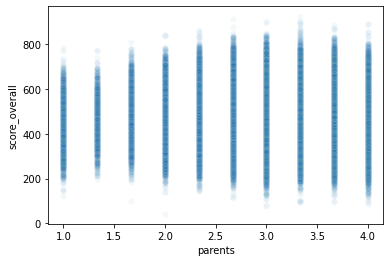

In [35]:
sb.scatterplot(x=df_pisa['parents'],y=df_pisa['score_overall'],alpha=.05);

In [36]:
df_pisa[['parents','score_overall']].corr()

parents  score_overall
parents        1.000000      -0.011132
score_overall -0.011132       1.000000

**Again, there does not seem to have  a correaltion between parents and score_overall**

**ATTITUDE BY PARENTAL VIEW**

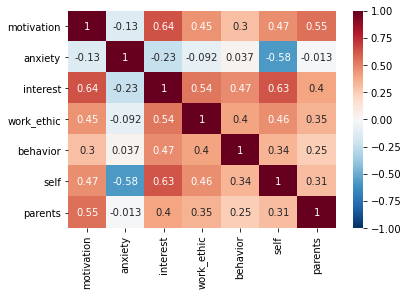

In [37]:
sb.heatmap(data=df_pisa[attitude+['parents']].corr(), center=0, cmap="RdBu_r",annot=True, vmin=-1, vmax=1);


**There is a moderate positive corretion of how the student's perceive the parent's attitude towards mathematics and the student's motivation for mathematics.**

### MULTIVARIATE EXPLORATION ###

**MOTIVATION SCORE BY GENDER BY COUNTRY**

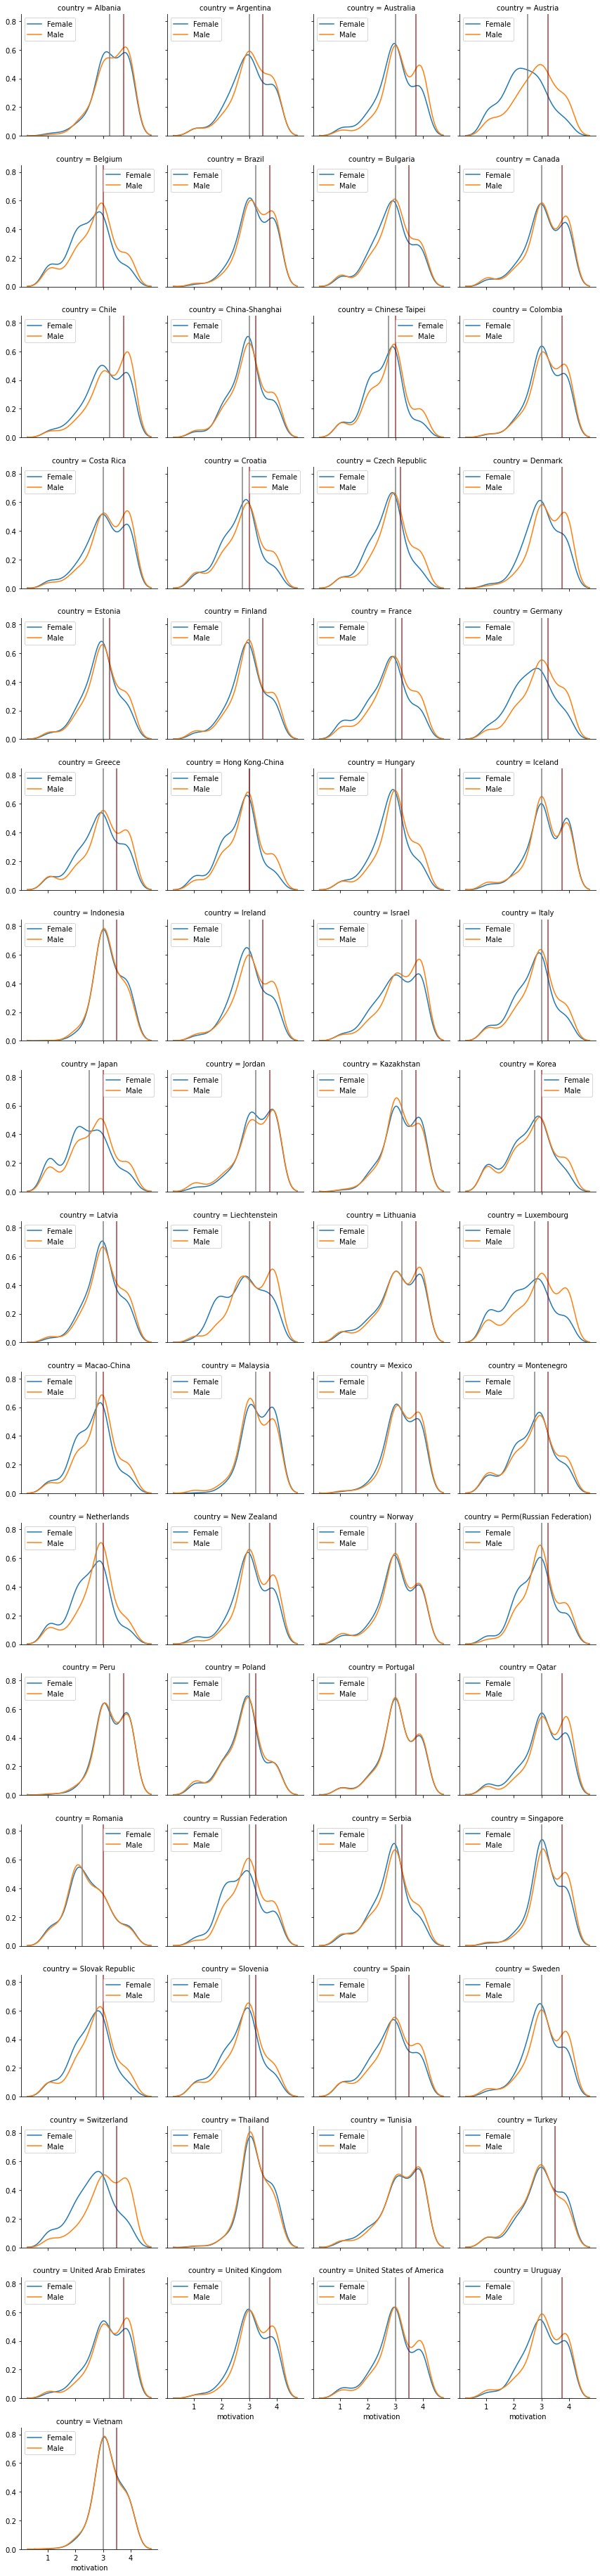

In [38]:
g=sb.FacetGrid(data=df_pisa, col='country', hue='gender', col_wrap=4)
g.map(sb.kdeplot, 'motivation', bw=1/4)

for ax, c in zip(g.axes.flat, country):
    ax.axvline(x=df_pisa.query('country==@c').motivation.quantile(.5), color='grey')
    ax.axvline(x=df_pisa.query('country==@c').motivation.quantile(.75), color='maroon', alpha=.75)
    ax.legend()

**Due to the fact that most countries do not have an even 50/50 split among gender, I wanted to depict the motivation scores by density.**

**The grey vertical lines shown above shows the 50 percentile motivation score for each country meanwhile the maroon lines depict the 75 percentile. Notice that almost all countries show the male students outweighing female students in motivation scores.**

**ANXIETY SCORE BY GENDER BY COUNTRY**

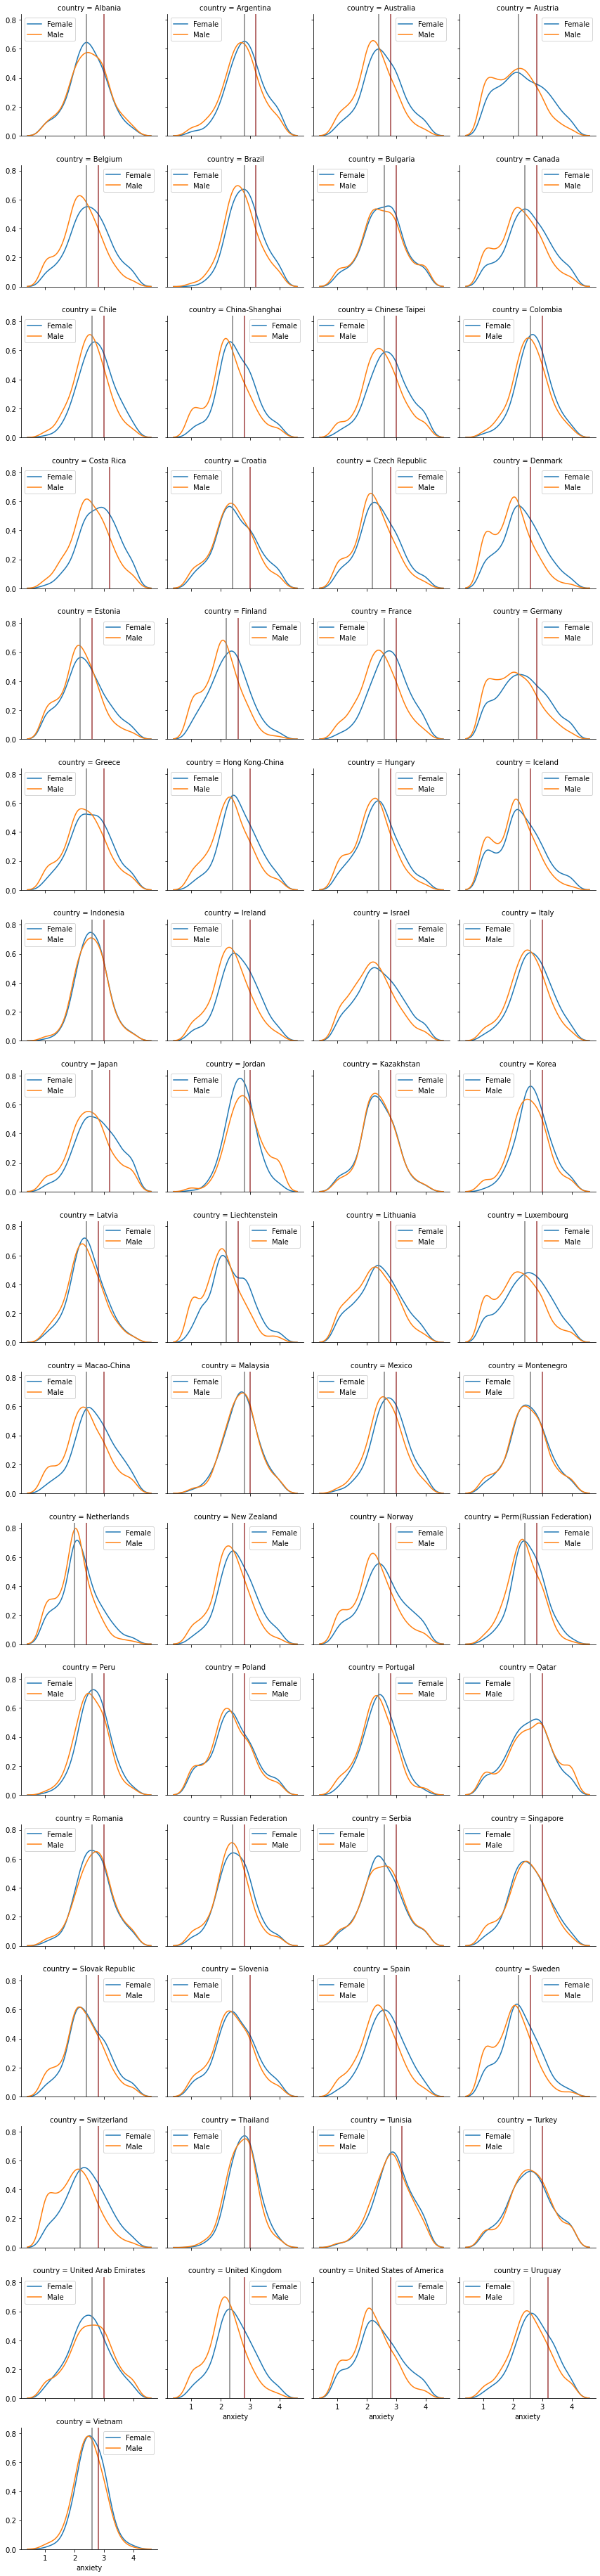

In [39]:
g=sb.FacetGrid(data=df_pisa, col='country', hue='gender', col_wrap=4)
g.map(sb.kdeplot, 'anxiety', bw=1/5)

for ax, c in zip(g.axes.flat, country):
    ax.axvline(x=df_pisa.query('country==@c').anxiety.quantile(.5), color='grey')
    ax.axvline(x=df_pisa.query('country==@c').anxiety.quantile(.75), color='maroon', alpha=.75)
    ax.legend()

**Almost all of the countries show females have a higher than average or similar axienty score compared to their male counterpart.**

**INTEREST SCORE BY GENDER BY COUNTRY**

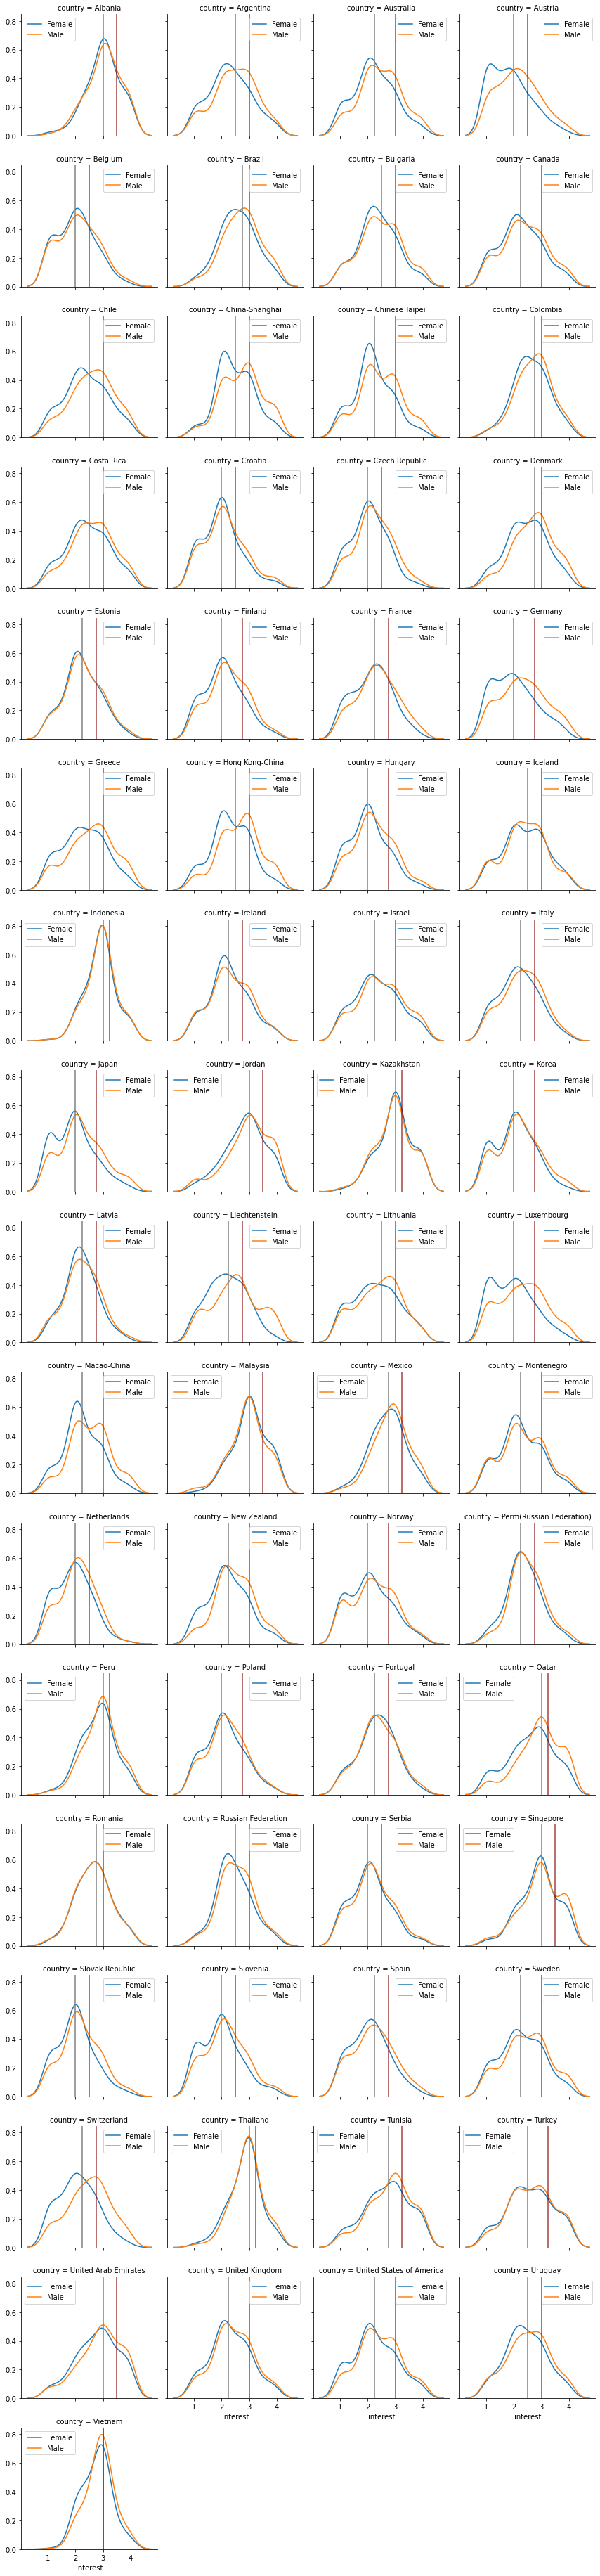

In [40]:
g=sb.FacetGrid(data=df_pisa, col='country', hue='gender', col_wrap=4)
g.map(sb.kdeplot, 'interest', bw=1/4)

for ax, c in zip(g.axes.flat, country):
    ax.axvline(x=df_pisa.query('country==@c').interest.quantile(.5), color='grey')
    ax.axvline(x=df_pisa.query('country==@c').interest.quantile(.75), color='maroon', alpha=.75)
    ax.legend()

**All of the countries show that the male proportion scored the most compared to the females.**

**WORK ETHIC SCORE BY GENDER BY COUNTRY**

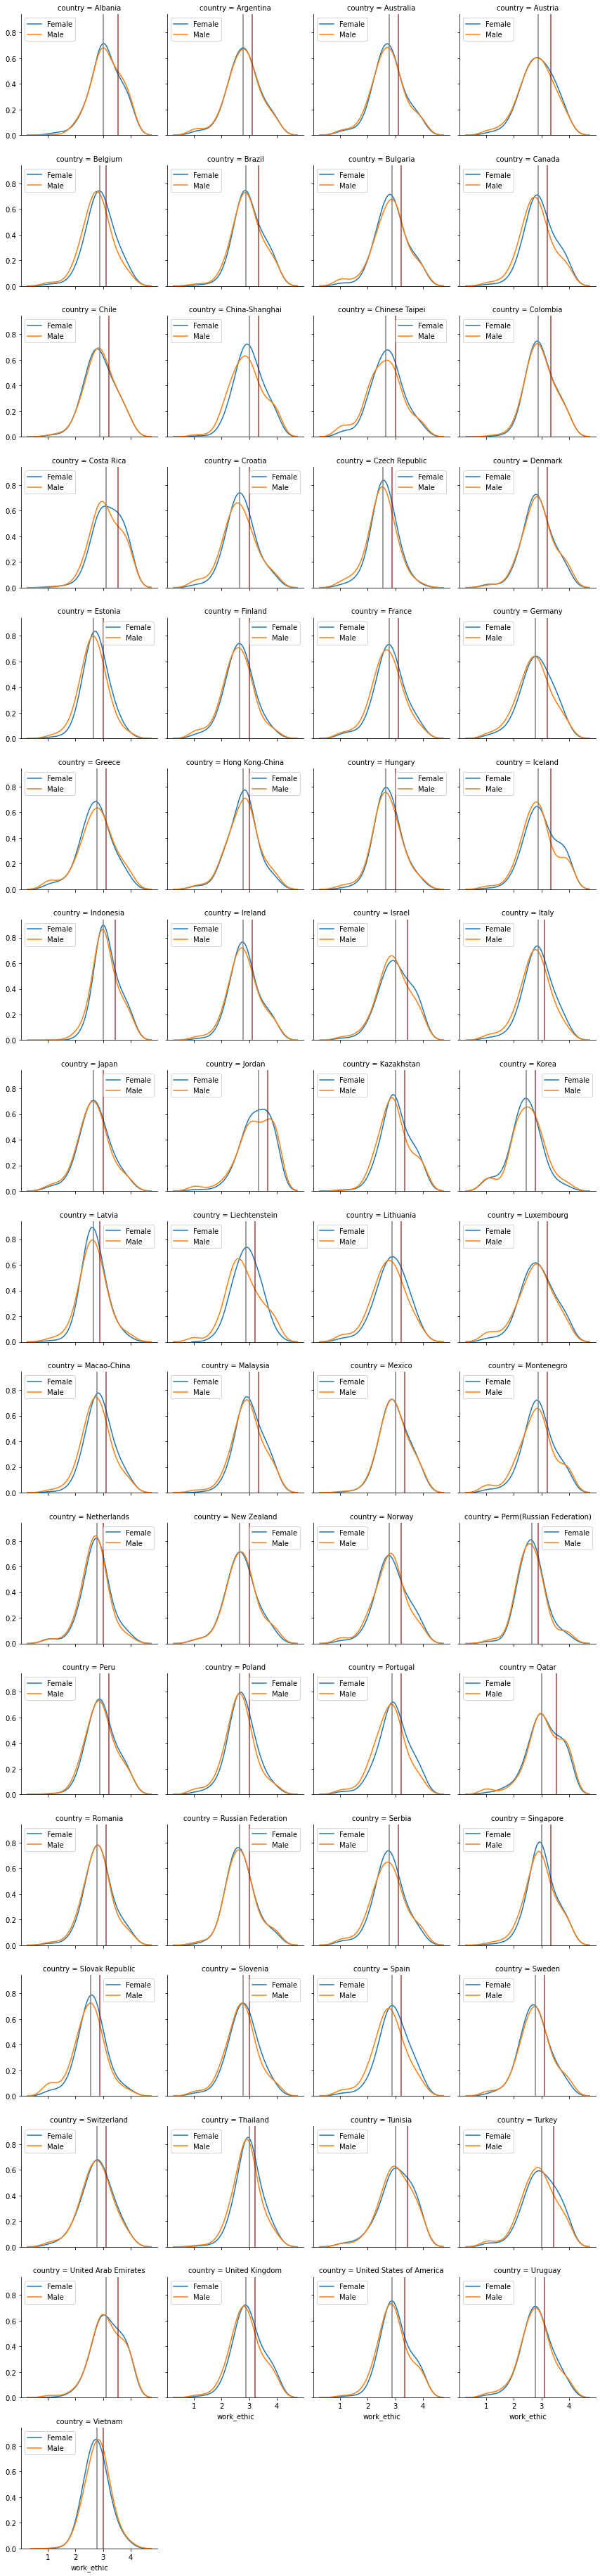

In [41]:
g=sb.FacetGrid(data=df_pisa, col='country', hue='gender', col_wrap=4)
g.map(sb.kdeplot, 'work_ethic', bw=1/4)

for ax, c in zip(g.axes.flat, country):
    ax.axvline(x=df_pisa.query('country==@c').work_ethic.quantile(.5), color='grey')
    ax.axvline(x=df_pisa.query('country==@c').work_ethic.quantile(.75), color='maroon', alpha=.75)
    ax.legend()

**Under Work Ethic, the females seem to score higher (or about the same) in proportion comparted to the males.**

**BEHAVIOR SCORE BY GENDER BY COUNTRY**

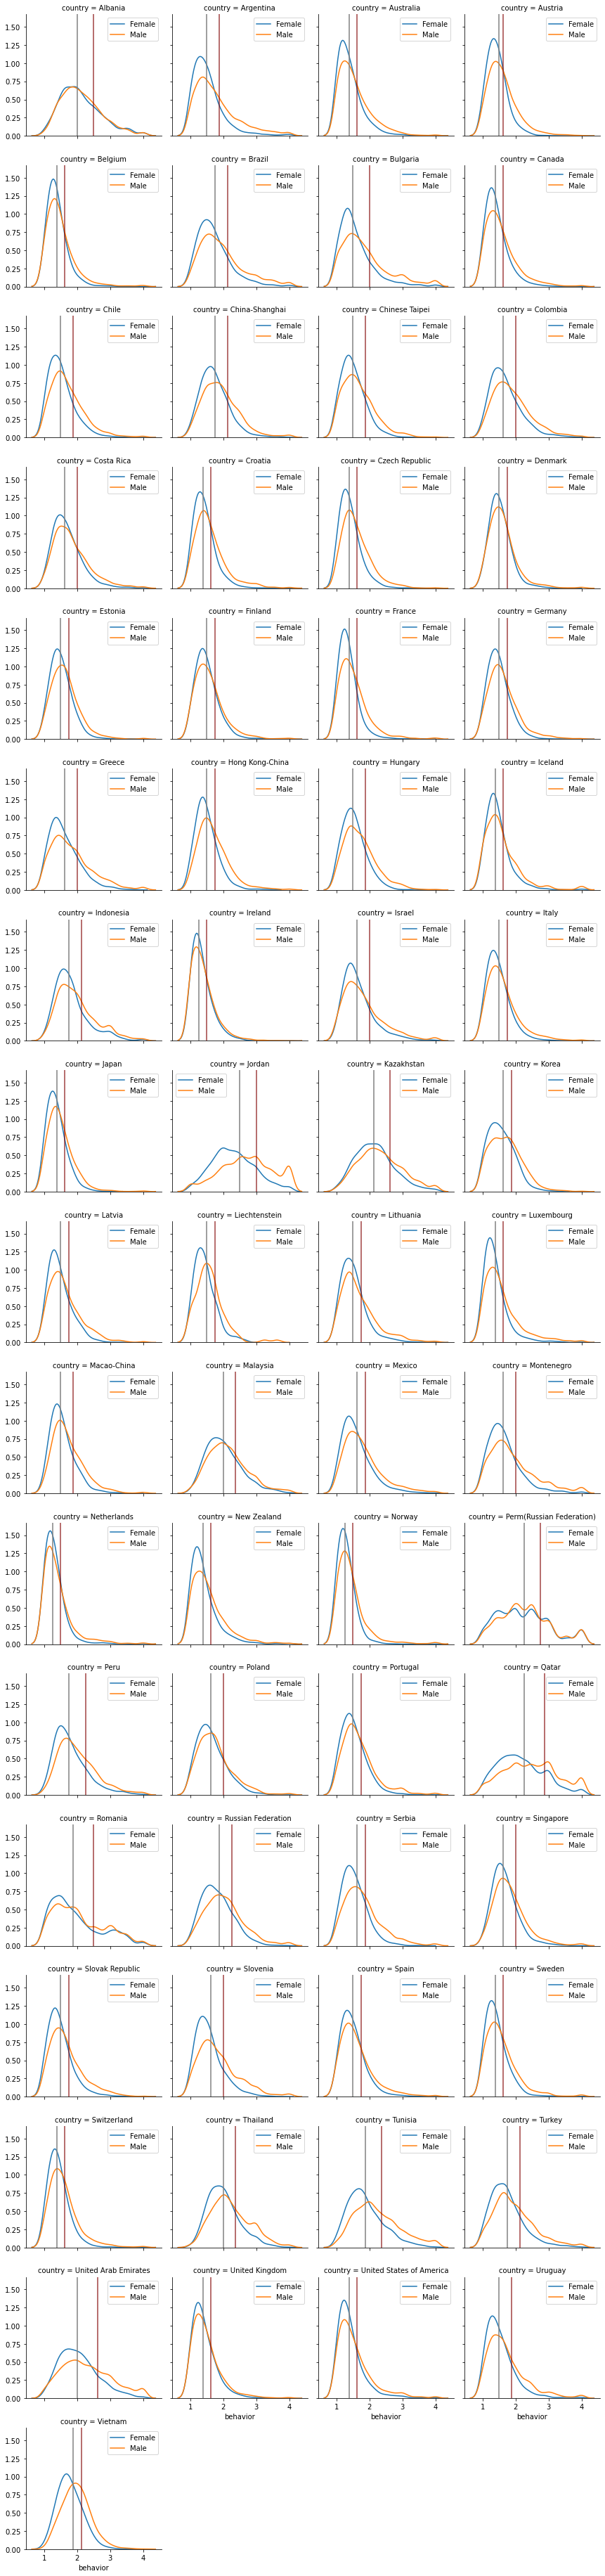

In [42]:
g=sb.FacetGrid(data=df_pisa, col='country', hue='gender', col_wrap=4)
g.map(sb.kdeplot, 'behavior', bw=.125)

for ax, c in zip(g.axes.flat, country):
    ax.axvline(x=df_pisa.query('country==@c').behavior.quantile(.5), color='grey')
    ax.axvline(x=df_pisa.query('country==@c').behavior.quantile(.75), color='maroon', alpha=.75)
    ax.legend()

**Under behavior, males seem to have a higher score. A majority of these countries also have scores skewed the the right.**

**SELF SCORE BY GENDER BY COUNTRY**

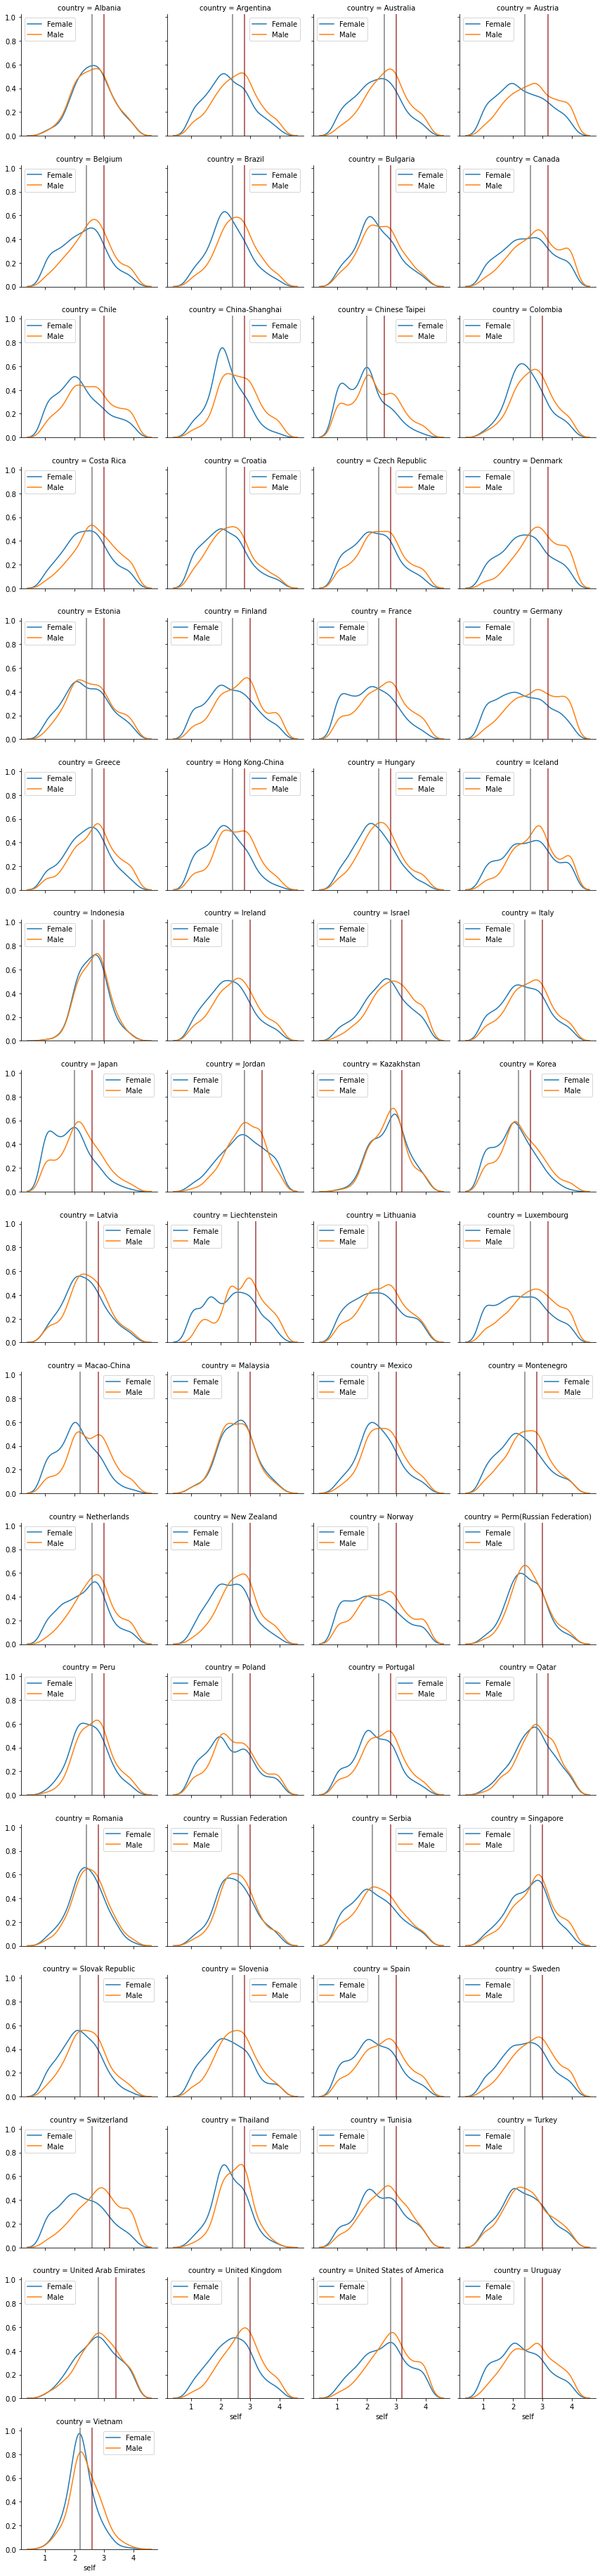

In [43]:
g=sb.FacetGrid(data=df_pisa, col='country', hue='gender', col_wrap=4)
g.map(sb.kdeplot, 'self', bw=1/5)

for ax, c in zip(g.axes.flat, country):
    ax.axvline(x=df_pisa.query('country==@c').self.quantile(.5), color='grey')
    ax.axvline(x=df_pisa.query('country==@c').self.quantile(.75), color='maroon', alpha=.75)
    ax.legend()

**PARENTAL SCORE BY GENDER BY COUNTRY**

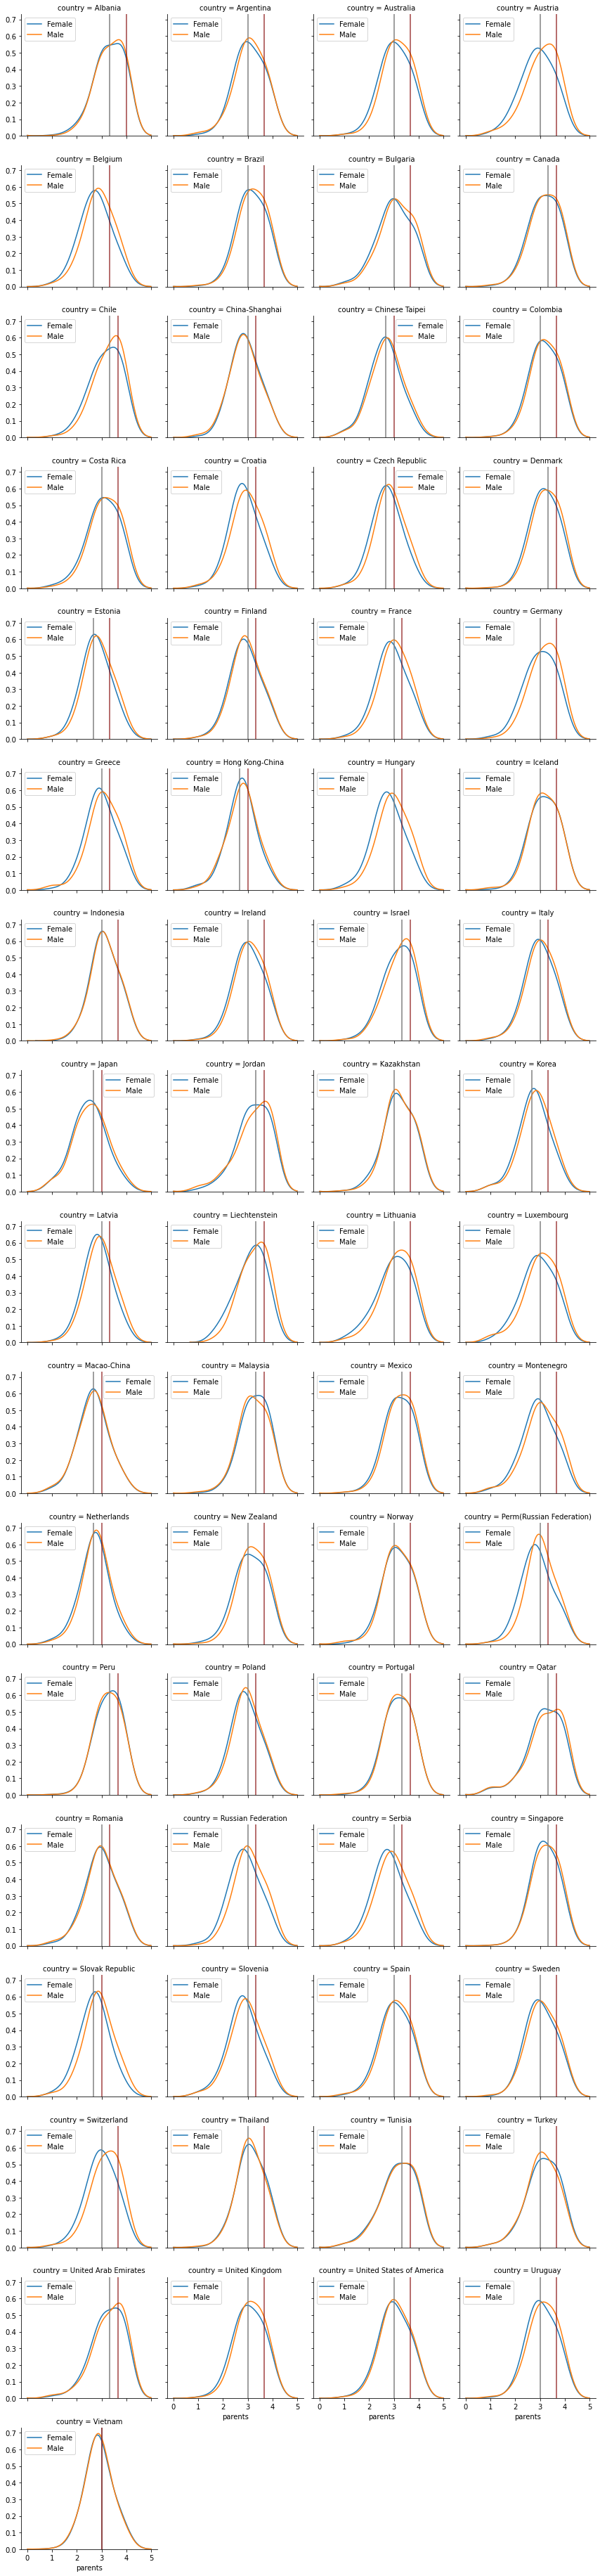

In [44]:
g=sb.FacetGrid(data=df_pisa, col='country', hue='gender', col_wrap=4)
g.map(sb.kdeplot, 'parents', bw=1/3)

for ax, c in zip(g.axes.flat, country):
    ax.axvline(x=df_pisa.query('country==@c').parents.quantile(.5), color='grey')
    ax.axvline(x=df_pisa.query('country==@c').parents.quantile(.75), color='maroon', alpha=.75)
    ax.legend()

**LET'S GO AHEAD AND TAKE A LOOK AT THE CHANGES IN OUR DATA AS THE TOP PERCENTILE UNDER OVERALL SCORE INCREASES**

In [5]:
df=pd.DataFrame(columns=['nth_percentile','m_prop','f_prop',
                         'avg_motivation','avg_anxiety','avg_interest','avg_work_ethic','avg_parents','avg_behavior','avg_self',
                        'm_motivation','m_anxiety','m_interest','m_work_ethic','m_parents','m_behavior','m_self',
                        'f_motivation','f_anxiety','f_interest','f_work_ethic','f_parents','f_behavior','f_self'])

In [6]:
for i in range(100):
    n=i*.01
    
    s=df_pisa.score_overall.quantile(n)
    df_top=df_pisa.query('score_overall>=@s')
    
    m_prop= df_top.gender.value_counts()['Male']/df_top.gender.value_counts().sum()
    f_prop= df_top.gender.value_counts()['Female']/df_top.gender.value_counts().sum()    
    
    motivation=df_top.motivation.mean()
    anxiety=df_top.anxiety.mean()
    interest=df_top.interest.mean()
    work_ethic=df_top.work_ethic.mean()
    parents=df_top.parents.mean()
    behavior= df_top.behavior.mean()
    self=df_top.self.mean()
    
    df_f=df_top.query('gender=="Female"')
    f_motivation=df_f.motivation.mean()
    f_anxiety=df_f.anxiety.mean()
    f_interest=df_f.interest.mean()
    f_work_ethic=df_f.work_ethic.mean()
    f_parents=df_f.parents.mean()
    f_behavior= df_f.behavior.mean()
    f_self=df_f.self.mean()
    
    df_m=df_top.query('gender=="Male"')
    m_motivation=df_m.motivation.mean()
    m_anxiety=df_m.anxiety.mean()
    m_interest=df_m.interest.mean()
    m_work_ethic=df_m.work_ethic.mean()
    m_parents=df_m.parents.mean()
    m_behavior= df_m.behavior.mean()
    m_self=df_m.self.mean()
    
    df=df.append({'nth_percentile':n,'m_prop':m_prop,'f_prop':f_prop,
                  'avg_motivation':motivation,'avg_anxiety':anxiety,'avg_interest':interest,
                  'avg_work_ethic':work_ethic,'avg_parents':parents,'avg_behavior':behavior,'avg_self':self,
                  'm_motivation':m_motivation,'m_anxiety':m_anxiety,'m_interest':m_interest,
                  'm_work_ethic':m_work_ethic,'m_parents': m_parents,'m_behavior':m_behavior,'m_self':m_self,
                  'f_motivation':f_motivation,'f_anxiety':f_anxiety,'f_interest':f_interest,
                  'f_work_ethic':f_work_ethic,'f_parents':f_parents,'f_behavior':f_behavior,'f_self':f_behavior},
                 ignore_index=True)

In [7]:
df.head()

nth_percentile    m_prop    f_prop  avg_motivation  avg_anxiety  \
0            0.00  0.495223  0.504777        2.988886     2.495314   
1            0.01  0.495037  0.504963        2.988211     2.492472   
2            0.02  0.495072  0.504928        2.987725     2.489371   
3            0.03  0.495181  0.504819        2.986818     2.485832   
4            0.04  0.495532  0.504468        2.986120     2.482316   

   avg_interest  avg_work_ethic  avg_parents  avg_behavior  avg_self  ...  \
0      2.445061        2.866265     3.066485      1.677428  2.482890  ...   
1      2.443034        2.865957     3.065976      1.674171  2.483480  ...   
2      2.441164        2.865658     3.065535      1.670887  2.484580  ...   
3      2.439023        2.865128     3.064948      1.667679  2.485826  ...   
4      2.437157        2.864962     3.064312      1.665027  2.487382  ...   

   m_parents  m_behavior    m_self  f_motivation  f_anxiety  f_interest  \
0   3.097665    1.758956  2.598975      2.940772   2.577510    2.380483   
1   3.097457    1.754949  2.599340      2.939370   2.574964    2.378237   
2   3.097457    1.751146  2.600384      2.938198   2.572108    2.376208   
3   3.097180    1.747024  2.601548      2.936801   2.568881    2.374099   
4   3.096775    1.743762  2.602896      2.935303   2.565335    2.372029   

   f_work_ethic  f_parents  f_behavior    f_self  
0      2.900185   3.036302    1.599006  1.599006  
1      2.900086   3.035496    1.596455  1.596455  
2      2.900016   3.034598    1.593596  1.593596  
3      2.899889   3.033691    1.591236  1.591236  
4      2.900093   3.032779    1.589037  1.589037  

[5 rows x 24 columns]

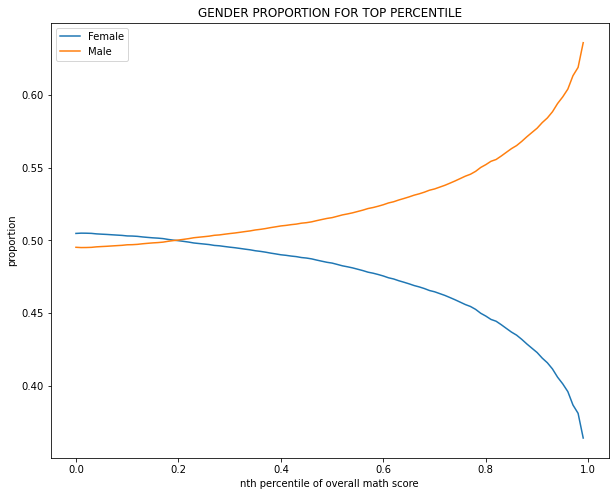

In [8]:
plt.figure(figsize=(10,8))
sb.lineplot(data=df,x='nth_percentile',y='f_prop', label='Female')
sb.lineplot(data=df,x='nth_percentile',y='m_prop',label='Male')
plt.legend()
plt.title('GENDER PROPORTION FOR TOP PERCENTILE')
plt.ylabel('proportion')
plt.xlabel('nth percentile of overall math score');


**We can see clearly here that as the top percentile increases, so does the gender gap. Initially, the female proportion was higher (due to the fact that there was a slightly more female students taking the survey as compared to the male students). But by the time we arrived to the top (approximately) 20th percentile, the amount of female students was equal to the amount of male students. All throughout the increase of top percentiles, we see that the proportion of male students strictly increases as well. Notice that the further we get along the top percentile of students, the gender gap's increase accelerates.**

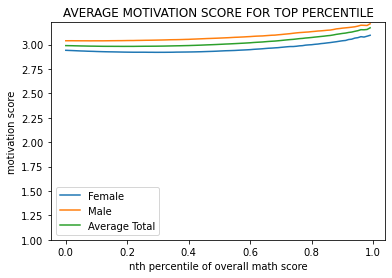

In [9]:
sb.lineplot(data=df,x='nth_percentile',y='f_motivation', label='Female')
sb.lineplot(data=df,x='nth_percentile',y='m_motivation', label='Male')
sb.lineplot(data=df,x='nth_percentile',y='avg_motivation', label='Average Total')
plt.legend()
plt.title('AVERAGE MOTIVATION SCORE FOR TOP PERCENTILE')
plt.ylim(bottom=1)
plt.ylabel('motivation score')
plt.xlabel('nth percentile of overall math score');

**The average motivation score for males is consistently higher that the average motivation score for females.**

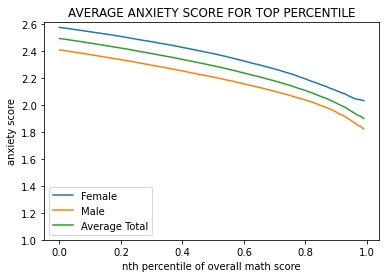

In [10]:
sb.lineplot(data=df,x='nth_percentile',y='f_anxiety', label='Female')
sb.lineplot(data=df,x='nth_percentile',y='m_anxiety', label='Male')
sb.lineplot(data=df,x='nth_percentile',y='avg_anxiety', label='Average Total')
plt.legend()
plt.title('AVERAGE ANXIETY SCORE FOR TOP PERCENTILE')
plt.ylim(bottom=1)
plt.ylabel('anxiety score')
plt.xlabel('nth percentile of overall math score');


**The average anxiety score for females is consistently higher than the average anxiety score for males. As the top percentile increases, the anxiety scores for both gender decreases.**

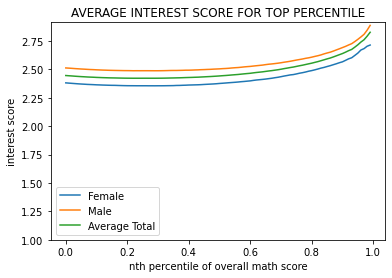

In [11]:
sb.lineplot(data=df,x='nth_percentile',y='f_interest', label='Female')
sb.lineplot(data=df,x='nth_percentile',y='m_interest', label='Male')
sb.lineplot(data=df,x='nth_percentile',y='avg_interest', label='Average Total')
plt.legend()
plt.title('AVERAGE INTEREST SCORE FOR TOP PERCENTILE')
plt.ylim(bottom=1)
plt.ylabel('interest score')
plt.xlabel('nth percentile of overall math score');


**The average interest score for males is consistently higher that the average interest score for females.**

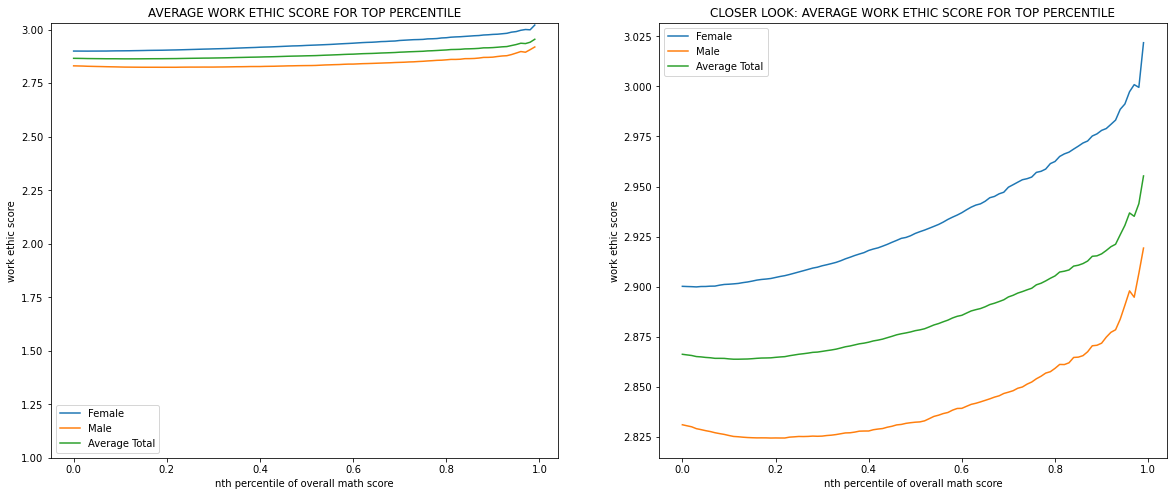

In [12]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
sb.lineplot(data=df,x='nth_percentile',y='f_work_ethic', label='Female')
sb.lineplot(data=df,x='nth_percentile',y='m_work_ethic', label='Male')
sb.lineplot(data=df,x='nth_percentile',y='avg_work_ethic', label='Average Total')
plt.legend()
plt.title('AVERAGE WORK ETHIC SCORE FOR TOP PERCENTILE')
plt.ylim(bottom=1)
plt.ylabel('work ethic score')
plt.xlabel('nth percentile of overall math score')

plt.subplot(1,2,2)
sb.lineplot(data=df,x='nth_percentile',y='f_work_ethic', label='Female')
sb.lineplot(data=df,x='nth_percentile',y='m_work_ethic', label='Male')
sb.lineplot(data=df,x='nth_percentile',y='avg_work_ethic', label='Average Total')
plt.legend()
plt.title('CLOSER LOOK: AVERAGE WORK ETHIC SCORE FOR TOP PERCENTILE')
plt.ylabel('work ethic score')
plt.xlabel('nth percentile of overall math score');


**The average work ethic score for females is consistently higher that the average work score for males.**

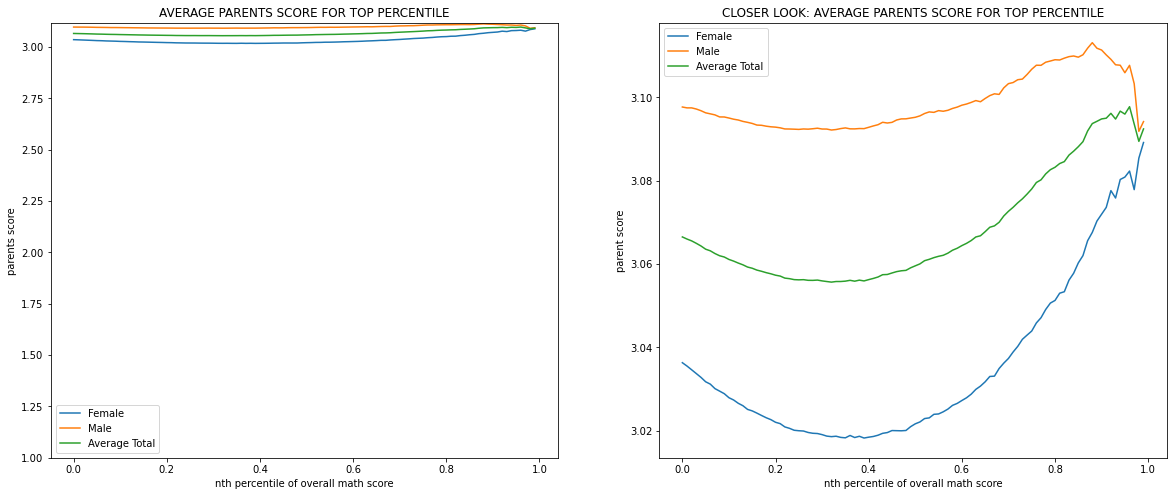

In [13]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
sb.lineplot(data=df,x='nth_percentile',y='f_parents', label='Female')
sb.lineplot(data=df,x='nth_percentile',y='m_parents', label='Male')
sb.lineplot(data=df,x='nth_percentile',y='avg_parents', label='Average Total')
plt.legend()
plt.title('AVERAGE PARENTS SCORE FOR TOP PERCENTILE')
plt.ylim(bottom=1)
plt.ylabel('parents score')
plt.xlabel('nth percentile of overall math score')

plt.subplot(1,2,2)
sb.lineplot(data=df,x='nth_percentile',y='f_parents', label='Female')
sb.lineplot(data=df,x='nth_percentile',y='m_parents', label='Male')
sb.lineplot(data=df,x='nth_percentile',y='avg_parents', label='Average Total')
plt.legend()
plt.title('CLOSER LOOK: AVERAGE PARENTS SCORE FOR TOP PERCENTILE')
plt.ylabel('parent score')
plt.xlabel('nth percentile of overall math score');


**The average parent score for males is consistently higher that the average motivation score for females. Notice how there is a sharp dip in parent score for males students at around the 85th percentile.**

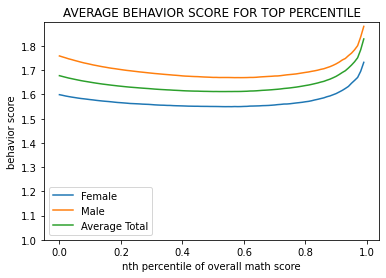

In [14]:
sb.lineplot(data=df,x='nth_percentile',y='f_behavior', label='Female')
sb.lineplot(data=df,x='nth_percentile',y='m_behavior', label='Male')
sb.lineplot(data=df,x='nth_percentile',y='avg_behavior', label='Average Total')
plt.legend()
plt.title('AVERAGE BEHAVIOR SCORE FOR TOP PERCENTILE')
plt.ylim(bottom=1)
plt.ylabel('behavior score')
plt.xlabel('nth percentile of overall math score');



**The average behavior score for males is consistently higher that the average behavior score for females.**

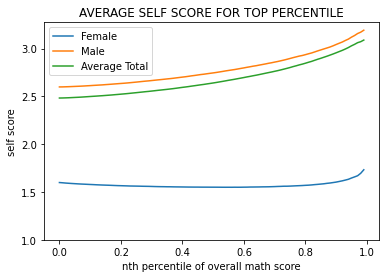

In [15]:
sb.lineplot(data=df,x='nth_percentile',y='f_self', label='Female')
sb.lineplot(data=df,x='nth_percentile',y='m_self', label='Male')
sb.lineplot(data=df,x='nth_percentile',y='avg_self', label='Average Total')
plt.legend()
plt.title('AVERAGE SELF SCORE FOR TOP PERCENTILE')
plt.ylim(bottom=1)
plt.ylabel('self score')
plt.xlabel('nth percentile of overall math score');



**The average self score for males is consistently higher that the average self score for females. Note how there is a large gap between how females feel about themselves regarding their math skills as compared to how males feel about themselves in their math skills.**